In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import cross_val_score,cross_val_predict, train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer,LabelEncoder

from sklearn.metrics import accuracy_score,classification_report, recall_score,confusion_matrix, roc_auc_score, precision_score, f1_score, roc_curve, auc 


import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
<font color="Darkblue" size=+2.5><b>Exploratory Data Analysis</b></font>

In [33]:
df = pd.read_csv(r'C:\Users\Ni Qie\Desktop\springboard\capstone2-final\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Duplicated and Missing Value check

In [34]:
df.duplicated().sum()

0

In [35]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
customerID,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## What's next?
-  We won't use **`customerID`**, so we will drop it.
- **`Total charges`** has object type we will change it to float type.
-  We will look at the numerical and categorical variables.
-  Outlier detection

In [37]:
df1 = df.drop('customerID',axis=1).copy()

In [52]:
#df['TotalCharges'].astype(float)  #could not convert string to float: ''

- When we try to change the datatype of the `Total charges` from object type to float type, we will get error.
- Let's find out what is the reason?

In [41]:
df1['TotalCharges'][3826]

' '

- Even though we don't see any missing values, when we look at the data, `total charges` feature has missing values.

In [43]:
df1.iloc[3826]

gender                             Male
SeniorCitizen                         0
Partner                             Yes
Dependents                          Yes
tenure                                0
PhoneService                        Yes
MultipleLines                       Yes
InternetService                      No
OnlineSecurity      No internet service
OnlineBackup        No internet service
DeviceProtection    No internet service
TechSupport         No internet service
StreamingTV         No internet service
StreamingMovies     No internet service
Contract                       Two year
PaperlessBilling                     No
PaymentMethod              Mailed check
MonthlyCharges                    25.35
TotalCharges                           
Churn                                No
Name: 3826, dtype: object

- Let's make the correct coding to define misisng values.

In [44]:
df1['TotalCharges']= df1['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)

In [45]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df1)

,Missing_Number,Missing_Percent
TotalCharges,11,0.001562
gender,0,0.000000
SeniorCitizen,0,0.000000
MonthlyCharges,0,0.000000
PaymentMethod,0,0.000000
PaperlessBilling,0,0.000000
Contract,0,0.000000
StreamingMovies,0,0.000000
StreamingTV,0,0.000000
TechSupport,0,0.000000


-We will fill missing values with the mean of `total charges`

In [50]:
df1['TotalCharges'] = df1['TotalCharges'].fillna(df1['TotalCharges'].mean())

In [51]:
df1['TotalCharges'].isnull().sum()

0

-Now let's get the list of the numerical and categorical features.

In [55]:
category_cols = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
                'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                'PaymentMethod']

In [56]:
numeric_cols = ['MonthlyCharges', 'TotalCharges']

In [57]:
target = 'Churn'

-Outlier Detection

In [58]:
df1[numeric_cols].describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2283.300441
std,30.090047,2265.000258
min,18.250000,18.800000
25%,35.500000,402.225000
50%,70.350000,1400.550000
75%,89.850000,3786.600000
max,118.750000,8684.800000


Text(0.5, 0, 'TotalCharges')

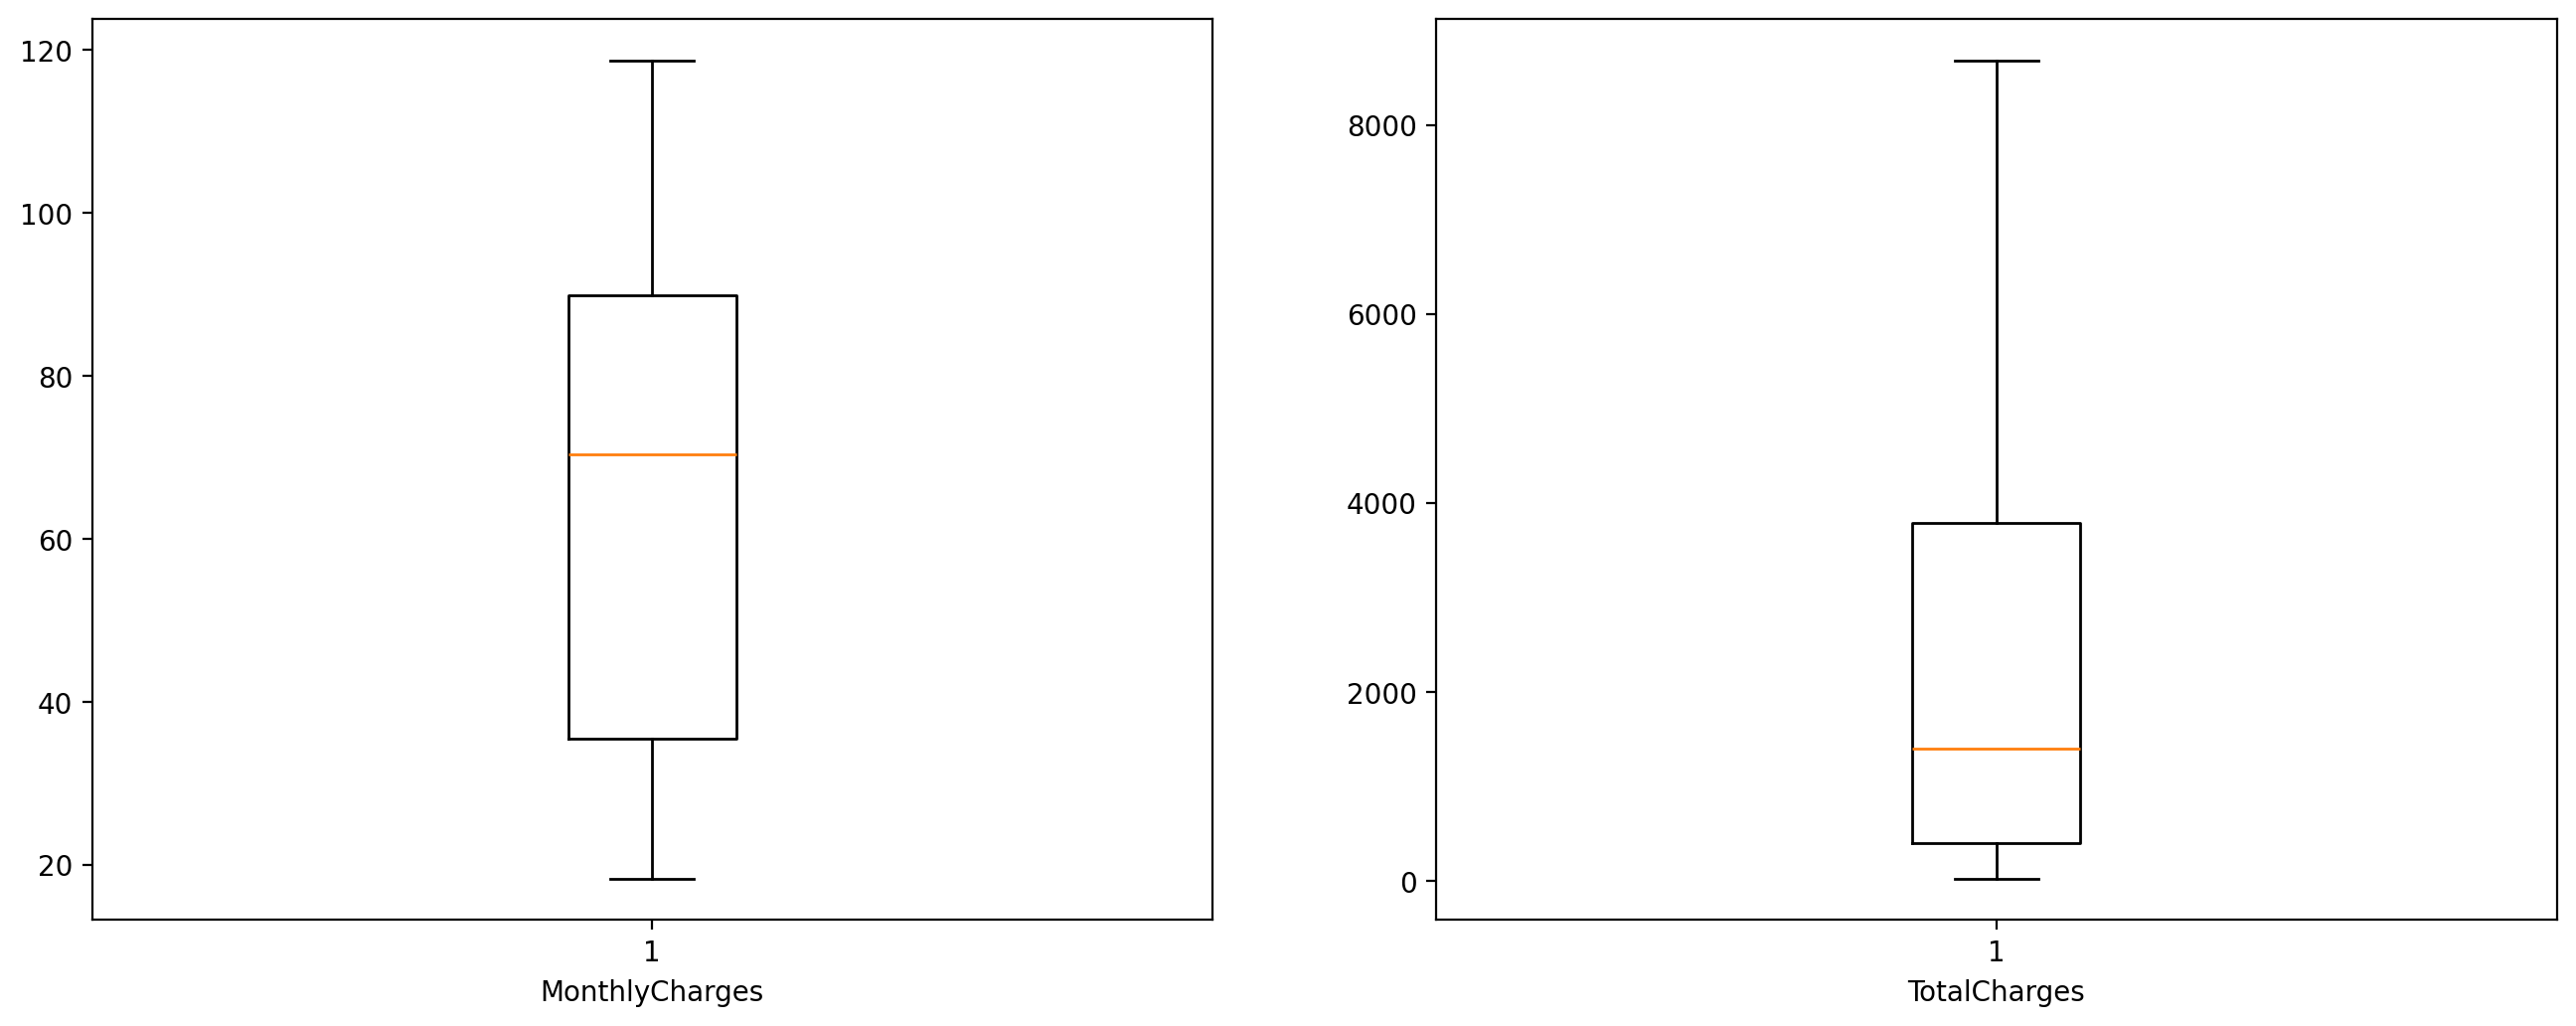

In [59]:
plt.figure(figsize=(16, 6), dpi=200)
plt.subplot(121)
plt.boxplot(df1['MonthlyCharges'])
plt.xlabel('MonthlyCharges')
plt.subplot(122)
plt.boxplot(df1['TotalCharges'])
plt.xlabel('TotalCharges')

There is no outliers in the numeric columns, as shown in the boxplot above.

<Axes: xlabel='TotalCharges', ylabel='Count'>

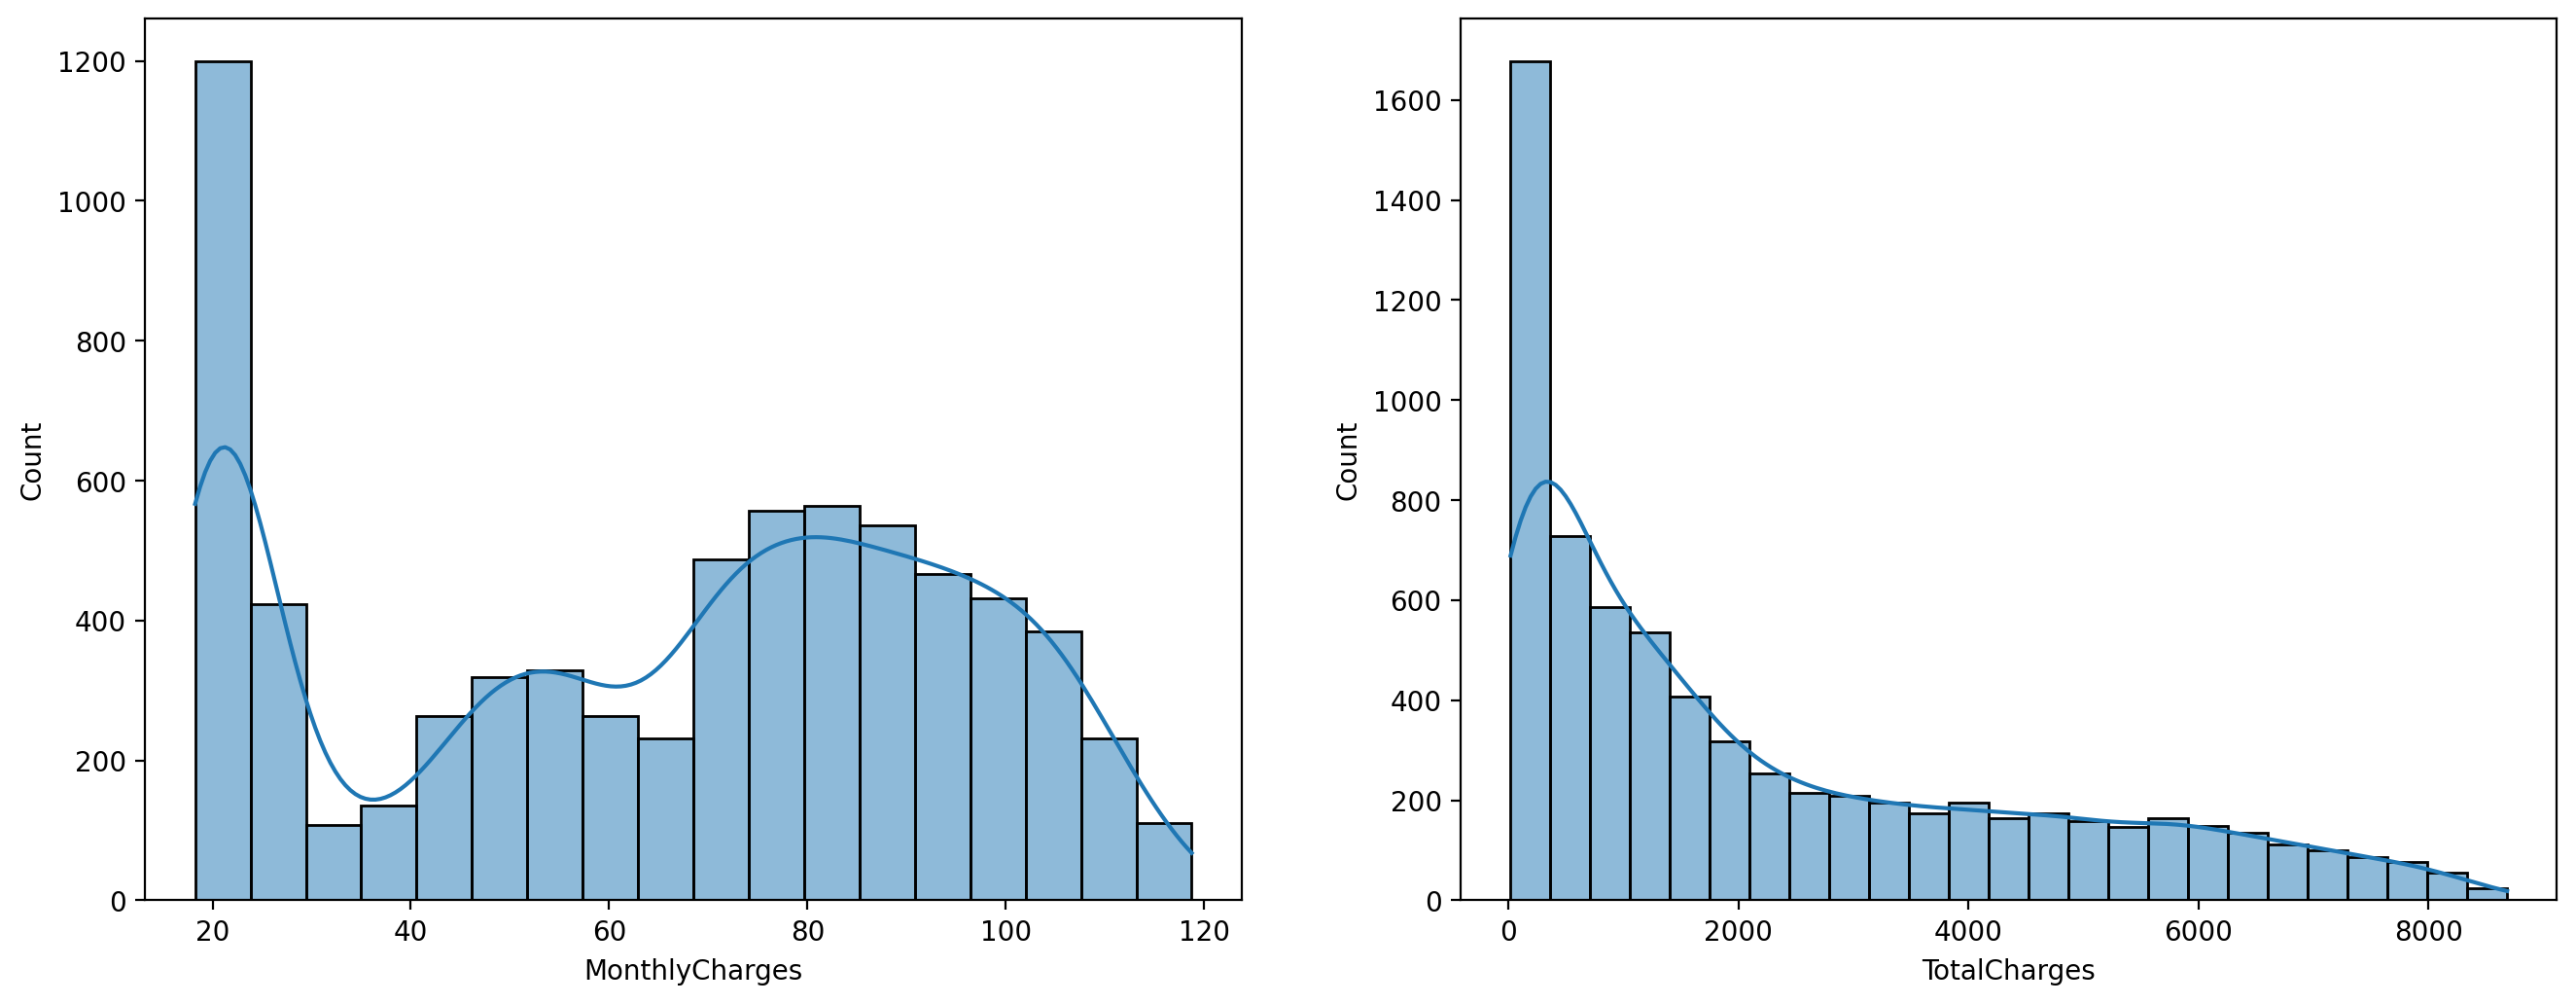

In [61]:
plt.figure(figsize=(16, 6), dpi=200)
plt.subplot(121)
sns.histplot(df1['MonthlyCharges'], kde=True) 
plt.subplot(122)
sns.histplot(df1['TotalCharges'], kde=True)

From the above image, we can also basically see the basic distribution of monthly expenses and total expenses. For most users, both monthly expenses and total expenses are relatively low. The fluctuations in monthly expenses are very likely due to the combined pricing of certain packages."

In [62]:
df1.to_csv(r'C:\Users\Ni Qie\Desktop\springboard\capstone2-final\data\WA_Fn-UseC_-Telco-Customer-Churn_cleaned.csv')